In [136]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


In [137]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')
titanic_gender = pd.read_csv('gender_submission.csv')
titanic_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [138]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [139]:
survivors_gender_class = titanic_train.groupby(['Sex', 'Pclass'])['Survived'].sum().unstack() #get sum of survivors by gender and class
survivors_gender_class

Pclass,1,2,3
Sex,,,
female,91,70,72
male,45,17,47


In [140]:
count_gender_class = titanic_train.groupby(['Sex', 'Pclass']).size().unstack() #get count
percent_gender_class = (survivors_gender_class/count_gender_class)*100 #get percentage
count_gender_class, percent_gender_class

(Pclass    1    2    3
 Sex                  
 female   94   76  144
 male    122  108  347,
 Pclass          1          2          3
 Sex                                    
 female  96.808511  92.105263  50.000000
 male    36.885246  15.740741  13.544669)

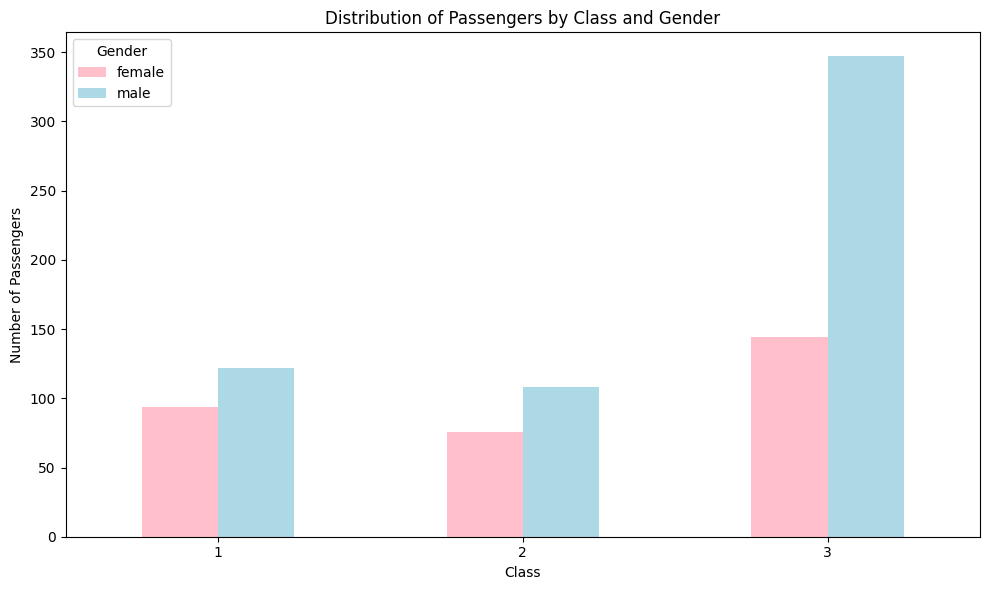

In [141]:
#transpose data
transposed_data = count_gender_class.transpose()

# Plot the bar chart
transposed_data.plot(kind='bar', figsize=(10, 6), stacked=False, color = ['pink', 'lightblue'])

# Add title and labels
plt.title('Distribution of Passengers by Class and Gender')
plt.ylabel('Number of Passengers')
plt.xlabel('Class')
plt.xticks(rotation=0)
plt.legend(title='Gender')

# Display the chart
plt.tight_layout()
plt.show()

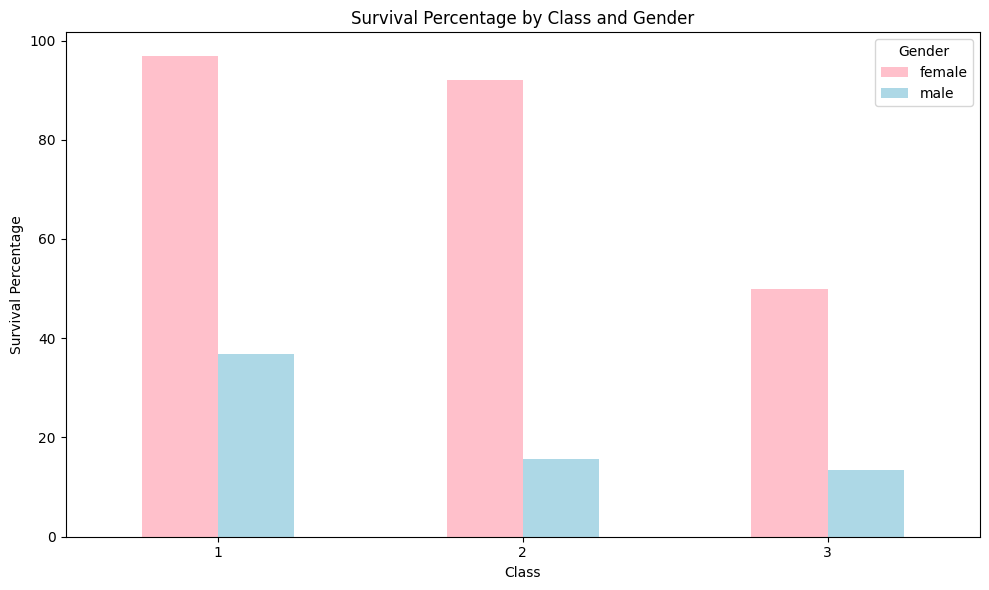

In [142]:
#transpose data
transposed_percent_data = percent_gender_class.transpose()

# Plot the bar chart
transposed_percent_data.plot(kind='bar', figsize=(10, 6), stacked=False, color = ['pink', 'lightblue'])

# Add title and labels
plt.title('Survival Percentage by Class and Gender')
plt.ylabel('Survival Percentage')
plt.xlabel('Class')
plt.xticks(rotation=0)
plt.legend(title='Gender')

# Show chart
plt.tight_layout()
plt.show()

In [143]:
#Change gender to numerical values
titanic_train['Sex'] = titanic_train['Sex'].map({'male': 0, 'female': 1}).astype(int)
titanic_test['Sex'] = titanic_test['Sex'].map({'male': 0, 'female': 1}).astype(int)
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [144]:
titanic_train.dropna(subset=['Age'], inplace=True) #drop rows with missing ages
titanic_test.dropna(subset=['Age'], inplace=True)
def bin_age(age): #bin ages into 4 groups
    if age <= 12:
        return 0  # Child
    elif 13 <= age <= 19:
        return 1  # Teen
    elif 20 <= age <= 64:
        return 2  # Adult
    else:
        return 3  # Senior
titanic_train['BinnedAge'] = titanic_train['Age'].apply(bin_age) #apply bin_age function to Age column
titanic_test['BinnedAge'] = titanic_test['Age'].apply(bin_age)
titanic_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BinnedAge
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0000,B28,NaN,2
532,533,0,3,"Elias, Mr. Joseph Jr",0,17.0,1,1,2690,7.2292,NaN,C,1
691,692,1,3,"Karun, Miss. Manca",1,4.0,0,1,349256,13.4167,NaN,C,0
588,589,0,3,"Gilinski, Mr. Eliezer",0,22.0,0,0,14973,8.0500,NaN,S,2
687,688,0,3,"Dakic, Mr. Branko",0,19.0,0,0,349228,10.1708,NaN,S,1
400,401,1,3,"Niskanen, Mr. Juha",0,39.0,0,0,STON/O 2. 3101289,7.9250,NaN,S,2
628,629,0,3,"Bostandyeff, Mr. Guentcho",0,26.0,0,0,349224,7.8958,NaN,S,2
586,587,0,2,"Jarvis, Mr. John Denzil",0,47.0,0,0,237565,15.0000,NaN,S,2
445,446,1,1,"Dodge, Master. Washington",0,4.0,0,2,33638,81.8583,A34,S,0
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",1,9.0,4,2,347082,31.2750,NaN,S,0


In [145]:
# extract titles from names
titanic_train['Title'] = titanic_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic_test['Title'] = titanic_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BinnedAge,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,2,Mr


In [146]:
# Get the common titles
common_titles = ['Mr', 'Miss', 'Mrs', 'Master']
# Replace the uncommon titles with 'Other'
titanic_train['Title'] = titanic_train['Title'].apply(lambda x: x if x in common_titles else 'Other')
titanic_test['Title'] = titanic_test['Title'].apply(lambda x: x if x in common_titles else 'Other')

# Map titles to numerical values
label_encoder = LabelEncoder()
titanic_train['Title'] = label_encoder.fit_transform(titanic_train['Title'])
titanic_test['Title'] = label_encoder.transform(titanic_test['Title'])

# Display changes
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BinnedAge,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,2,2


In [147]:

X_train = titanic_train['Sex'].values.reshape(-1, 1) #independent variable
y_train = titanic_train['Survived'] #dependent variable
X_test = titanic_test['Sex'].values.reshape(-1, 1)
# Create and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# Make predictions
probabilities = log_reg.predict_proba(X_test)
probabilities_df = pd.DataFrame(probabilities, columns=['Probability Not Survived', 'Probability Survived'])
df_with_name = pd.concat([titanic_test['Name'], probabilities_df], axis=1)
# Display predictions
df_with_name.head()


,Name,Probability Not Survived,Probability Survived
0,"Kelly, Mr. James",0.789412,0.210588
1,"Wilkes, Mrs. James (Ellen Needs)",0.254394,0.745606
2,"Myles, Mr. Thomas Francis",0.789412,0.210588
3,"Wirz, Mr. Albert",0.789412,0.210588
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.254394,0.745606


In [148]:
features = ['Sex','BinnedAge'] #features to use for prediction
X_train = titanic_train[features] #independent variables
y_train = titanic_train['Survived'] #dependent variable
X_test = titanic_test[features]
# Create and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# Make predictions
probabilities = log_reg.predict_proba(X_test)
probabilities_df = pd.DataFrame(probabilities, columns=['Probability Not Survived', 'Probability Survived'])
df_with_name = pd.concat([titanic_test['Name'], probabilities_df], axis=1)
# Display predictions
df_with_name.head()




,Name,Probability Not Survived,Probability Survived
0,"Kelly, Mr. James",0.800991,0.199009
1,"Wilkes, Mrs. James (Ellen Needs)",0.272750,0.727250
2,"Myles, Mr. Thomas Francis",0.800991,0.199009
3,"Wirz, Mr. Albert",0.800991,0.199009
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.272750,0.727250


In [149]:
features = ['Sex','Pclass', 'BinnedAge', 'Title'] #features to use for prediction
X_train = titanic_train[features] #independent variables
y_train = titanic_train['Survived'] #dependent variable
X_test = titanic_test[features]
# Create and train the model
log_reg = LogisticRegression() 
log_reg.fit(X_train, y_train)
# Make predictions
probabilities = log_reg.predict_proba(X_test)
probabilities_df = pd.DataFrame(probabilities, columns=['Probability Not Survived', 'Probability Survived'])
df_with_name = pd.concat([titanic_test['Name'], probabilities_df], axis=1)
# Display predictions
df_with_name.head()



,Name,Probability Not Survived,Probability Survived
0,"Kelly, Mr. James",0.918313,0.081687
1,"Wilkes, Mrs. James (Ellen Needs)",0.530233,0.469767
2,"Myles, Mr. Thomas Francis",0.787988,0.212012
3,"Wirz, Mr. Albert",0.918313,0.081687
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.530233,0.469767
